<a href="https://colab.research.google.com/github/Wikanda-Hongboonmee/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
BFI_data = pd.read_csv('/content/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## **Factor Analysis**

### **Assumptions :**

ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว 

มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้ 

โดย k < n

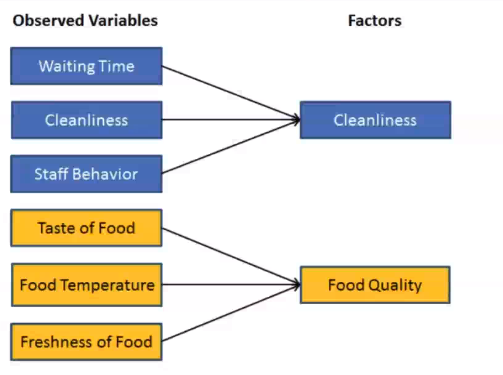

Assumptions :

*   There are no outliers in data.
*   Sample size should be greater than the factor.
*   There should not be ***perfect multicollinearity***
*   There should not be ***homoscadasticity between the variables***









### การทำ Factor Analysis

In [7]:
from factor_analyzer import factor_analyzer
import matplotlib.pyplot as plt

**วิธีการ install package อื่นๆ**

In [9]:
!pip install factor_analyzer # ทำการติดตั้ง factor_analyzer

In [10]:
from factor_analyzer import factor_analyzer
import matplotlib.pyplot as plt # เหมือนกับ from matplotlib import pyplot as plt

### **Quiz 5** 

เลือกข้อมูลเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง iloc [ ]

In [11]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [13]:
BFI_data_dropped2 = BFI_data_dropped.dropna() # ทำการตัดค่าที่ว่างออกไป

In [14]:
BFI_data_dropped.shape

(2800, 25)

In [15]:
BFI_data_dropped2.shape

(2436, 25)

## **Bartlett’s test**

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity # ทำการ import fuction calculate_bartlett_sphericity 

In [18]:
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped2) # ถ้าค่า p-value เท่ากับ 0 แสดงว่า data ไม่มี prefact multicollonearity
chi_square_value, p_value

(18170.966350869243, 0.0)

## **Kaiser-Meyer-Olkin (KMO) Test**

In [19]:
from factor_analyzer.factor_analyzer import calculate_kmo 

In [20]:
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped2)

In [23]:
kmo_model # เมื่อรันค่า KMO แล้วมีค่าน้อยกว่า 6 แสดงว่าไม่สามารถใช้ข้อมูลนี้ได้ (มีค่ามากยิ่งดี)

0.8485397221949221

## **Start Factors analysis**

Choosing the Number of Factors

In [27]:
from factor_analyzer import FactorAnalyzer # Import

In [28]:
fa = FactorAnalyzer(n_factors=20) # Define

In [29]:
data_fa = fa.fit_transform(BFI_data_dropped2)

In [30]:
data_fa.shape

(2436, 20)

In [31]:
ev,v = fa.get_eigenvalues() #คำนวณหาค่า eigen values เพื่อนำไป plot ในกราฟ Scree plot

วิธีตัดสินว่าเราจะลดเหลือกี่ Dimention (มี factors ทั้งหมดกี่ตัว)

In [32]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])


 **Scree plot** เป็นกราฟที่บอกว่า factor แต่ละตัวมีค่า eigen values เท่าไหร่

โดยการทำ Scree plot เพื่อมาดู factor ที่มากกว่า 1 แล้วจะนำ factor นั้นมาใช้

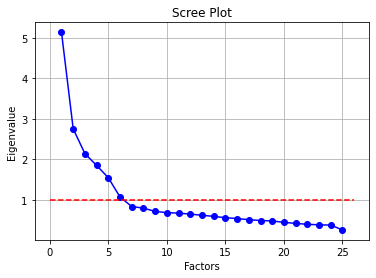

In [33]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped2.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped2.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [34]:
data_fa[:,:6] # ตัวที่ 1-6 มีค่ามากกว่า 1

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

## **Factor Loading**